# Postprocessing and Model Building

In [23]:
import os
import pickle
import json
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [24]:
main_filepath = '/sietch_colab/akapoor/Demographic_Inference'

CONFIG_FILEPATH = f'{main_filepath}/experiment_config.json'
MODEL_CONFIG_FILEPATH = f'{main_filepath}/model_config.json'

with open(CONFIG_FILEPATH, 'r') as f:
   experiment_config = json.load(f)

with open(MODEL_CONFIG_FILEPATH, 'r') as f:
   model_config = json.load(f)


CWD = os.getcwd()

# Use double quotes for the dictionary keys inside the f-string
EXPERIMENT_DIRECTORY = f"{experiment_config['demographic_model']}_dadi_analysis_{experiment_config['dadi_analysis']}_moments_analysis_{experiment_config['moments_analysis']}_momentsLD_analysis_{experiment_config['momentsLD_analysis']}_seed_{experiment_config['seed']}"
EXPERIMENT_NAME = f'sims_pretrain_{experiment_config["num_sims_pretrain"]}_sims_inference_{experiment_config["num_sims_inference"]}_seed_{experiment_config["seed"]}_num_replicates_{experiment_config["k"]}_top_values_{experiment_config["top_values_k"]}'
SIM_DIRECTORY = f"{EXPERIMENT_DIRECTORY}/sims/{EXPERIMENT_NAME}"

# Check if hidden_size is a list, and if so, join the elements with "_"
hidden_size = model_config['neural_net_hyperparameters']['hidden_size']
if isinstance(hidden_size, list):
    hidden_size_str = "_".join(map(str, hidden_size))  # Join list elements with "_"
else:
    hidden_size_str = str(hidden_size)  # Convert integer to string if not a list

# Build the MODEL_DIRECTORY string
MODEL_DIRECTORY = (
    f"{EXPERIMENT_DIRECTORY}/models/{EXPERIMENT_NAME}/"
    f"num_hidden_neurons_{hidden_size_str}_"
    f"num_hidden_layers_{model_config['neural_net_hyperparameters']['num_layers']}_"
    f"num_epochs_{model_config['neural_net_hyperparameters']['num_epochs']}_"
    f"dropout_value_{model_config['neural_net_hyperparameters']['dropout_rate']}_"
    f"weight_decay_{model_config['neural_net_hyperparameters']['weight_decay']}_"
    f"batch_size_{model_config['neural_net_hyperparameters']['batch_size']}_"
    f"EarlyStopping_{model_config['neural_net_hyperparameters']['EarlyStopping']}"
)


In [25]:
os.chdir('/sietch_colab/akapoor/Demographic_Inference/')
os.environ['PYTHONPATH'] = '/sietch_colab/akapoor/Demographic_Inference:' + os.environ.get('PYTHONPATH', '')

Just to check again, I want to look at the results for preprocessing

In [26]:
with open(os.path.join('/sietch_colab/akapoor/Demographic_Inference',f'{SIM_DIRECTORY}', 'preprocessing_results_obj.pkl'), 'rb') as f:
    preproc = pickle.load(f)

In [27]:
preproc['training']['indices'][0]

29

In [28]:
preproc['training']['predictions'].columns

Index(['dadi_rep1_N0', 'moments_rep1_N0', 'moments_rep1_FIM_element_0',
       'moments_rep1_FIM_element_1', 'moments_rep1_FIM_element_2',
       'moments_rep1_FIM_element_3', 'moments_rep1_FIM_element_4',
       'moments_rep1_FIM_element_5', 'moments_rep1_FIM_element_6',
       'moments_rep1_FIM_element_7', 'moments_rep1_FIM_element_8',
       'moments_rep1_FIM_element_9', 'moments_rep1_FIM_element_10',
       'moments_rep1_FIM_element_11', 'moments_rep1_FIM_element_12',
       'moments_rep1_FIM_element_13', 'moments_rep1_FIM_element_14',
       'dadi_rep1_N1', 'moments_rep1_N1', 'dadi_rep1_N2', 'moments_rep1_N2',
       'dadi_rep1_m12', 'moments_rep1_m12', 'dadi_rep1_m21',
       'moments_rep1_m21', 'dadi_rep1_t_split', 'moments_rep1_t_split',
       'dadi_rep2_N0', 'moments_rep2_N0', 'moments_rep2_FIM_element_0',
       'moments_rep2_FIM_element_1', 'moments_rep2_FIM_element_2',
       'moments_rep2_FIM_element_3', 'moments_rep2_FIM_element_4',
       'moments_rep2_FIM_element_5', '

In [29]:
preproc['training']['predictions']['moments_rep1_N0']

0       9297.421174
1       9059.899098
2       9184.560071
3       8774.019411
4       8000.005209
           ...     
795    10000.000000
796     9078.862572
797    10000.000000
798     8892.203779
799     9993.460554
Name: moments_rep1_N0, Length: 800, dtype: float64

In [30]:
preproc['training']['targets']['simulated_params_N0']

0      8198
1      8390
2      8576
3      8350
4      8055
       ... 
795    9370
796    8655
797    9530
798    8401
799    8691
Name: simulated_params_N0, Length: 800, dtype: int64

In [31]:
preproc['training']['targets']

,simulated_params_N0,simulated_params_N1,simulated_params_N2,simulated_params_m12,simulated_params_m21,simulated_params_t_split
0,8198,5008,6596,0.000232,0.000174,1886
1,8390,5913,7775,0.000219,0.000493,1927
2,8576,5746,7026,0.000495,0.000479,1798
3,8350,6925,6429,0.000235,0.000222,1739
4,8055,7008,6852,0.000289,0.000497,1864
...,...,...,...,...,...,...
795,9370,7182,6685,0.000497,0.000425,1571
796,8655,6771,6175,0.000443,0.000147,1725
797,9530,6176,6791,0.000489,0.000269,1729
798,8401,6877,7399,0.000462,0.000249,1859


In [32]:
plt.figure()
plt.scatter(preproc['training']['predictions']['dadi_rep1_Nb'], preproc['training']['targets']['simulated_params_Nb'])

KeyError: 'dadi_rep1_Nb'

<Figure size 640x480 with 0 Axes>

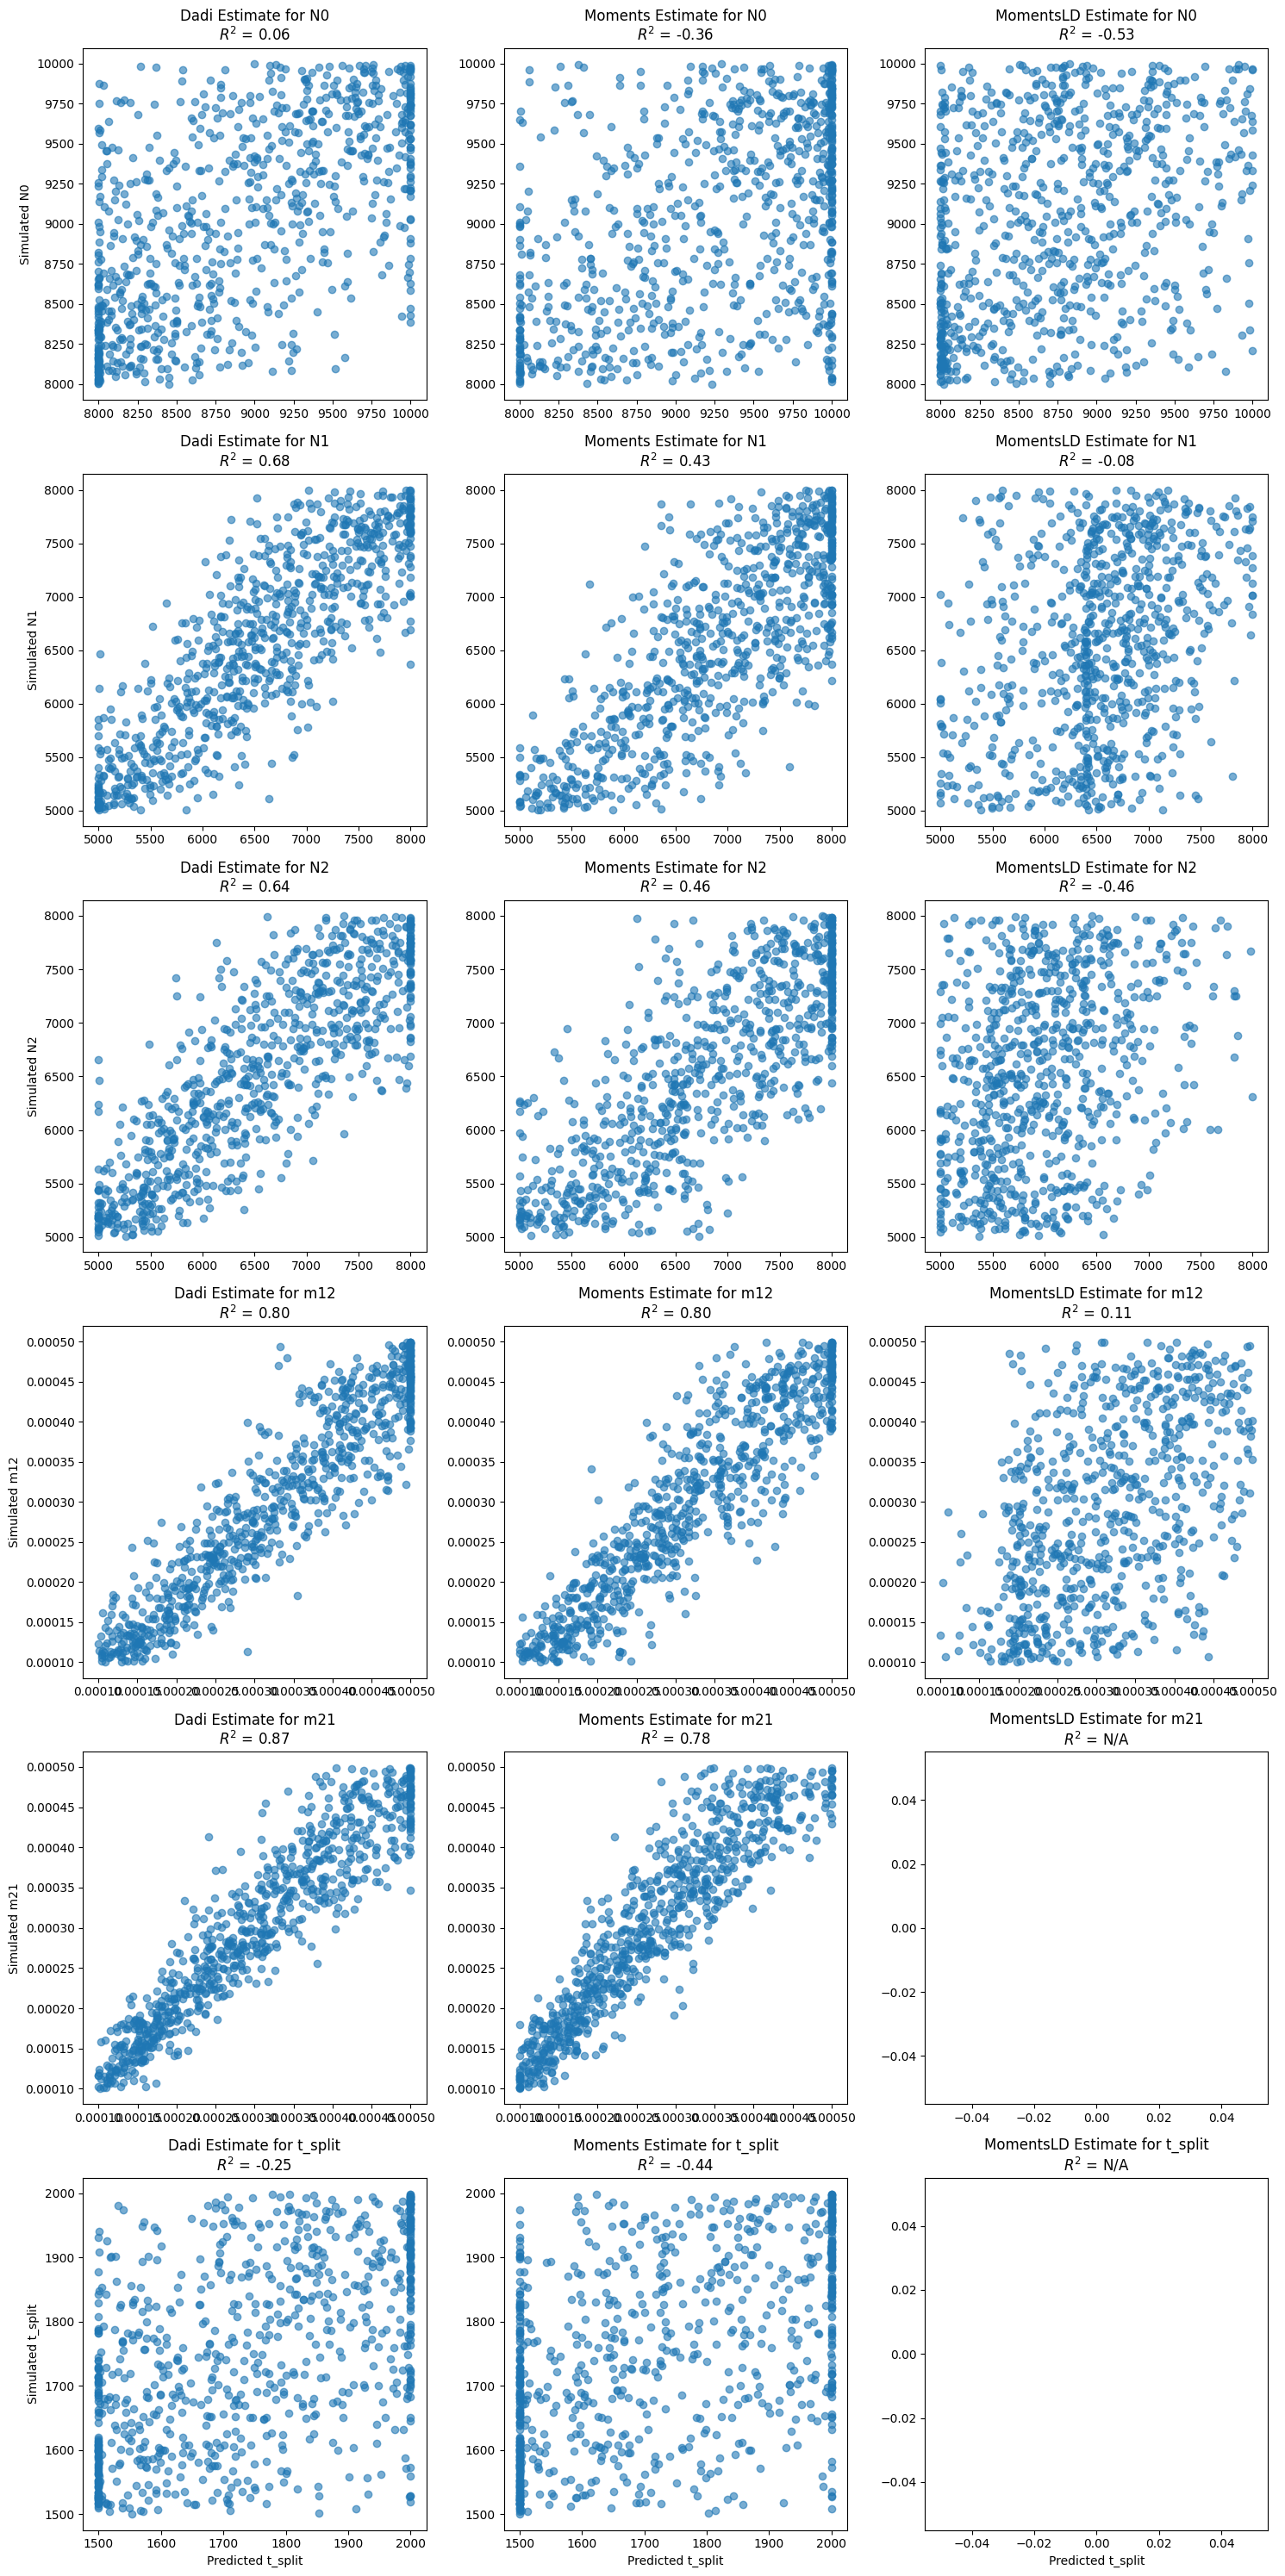

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define the methods and corresponding keys in `preproc`
methods = {
    'Dadi': 'dadi_rep1_{}',
    'Moments': 'moments_rep1_{}',
    'MomentsLD': 'momentsLD_{}'
}

# Define the parameters to plot
parameters = ['N0', 'N1', 'N2', 'm12', 'm21', 't_split']

# Load upper and lower bounds from experiment_config
upper_bounds = experiment_config.get('upper_bound_params', {})
lower_bounds = experiment_config.get('lower_bound_params', {})

# Function to filter out values outside parameter bounds
def filter_by_bounds(x, y, param):
    """
    Filters predicted values (x) and target values (y) based on parameter bounds.

    Args:
        x (np.array): Predicted values.
        y (np.array): Target values.
        param (str): Parameter name for looking up bounds.

    Returns:
        Tuple of filtered (x, y) within the bounds.
    """
    lower_bound = lower_bounds.get(param, -np.inf)
    upper_bound = upper_bounds.get(param, np.inf)

    # Mask to keep only values within bounds
    mask = (x >= lower_bound) & (x <= upper_bound) & (y >= lower_bound) & (y <= upper_bound)
    return x[mask], y[mask]

# Create a figure with subplots (one row per parameter, 3 columns for methods)
fig, axes = plt.subplots(len(parameters), 3, figsize=(15, 5 * len(parameters)))

# Loop through parameters and methods to create scatter plots
for row, param in enumerate(parameters):
    target_key = f'simulated_params_{param}'
    if target_key not in preproc['training']['targets']:
        continue  # Skip if parameter is missing

    target_values = np.array(preproc['training']['targets'][target_key])

    for col, (method, pred_template) in enumerate(methods.items()):
        pred_key = pred_template.format(param)  # Format the prediction key
        ax = axes[row, col] if len(parameters) > 1 else axes[col]  # Handle single-row case

        r2 = None  # Default to None

        if pred_key in preproc['training']['predictions']:
            pred_values = np.array(preproc['training']['predictions'][pred_key])

            # Apply bound-based filtering
            pred_values_filtered, target_values_filtered = filter_by_bounds(pred_values, target_values, param)

            # Compute R² score if possible
            if len(pred_values_filtered) > 1 and len(target_values_filtered) > 1:
                r2 = r2_score(target_values_filtered, pred_values_filtered)

            # Scatter plot (filtered data)
            ax.scatter(pred_values_filtered, target_values_filtered, alpha=0.6)

            # Determine appropriate axis limits
            if len(pred_values_filtered) > 0 and len(target_values_filtered) > 0:
                min_pred, max_pred = np.min(pred_values_filtered), np.max(pred_values_filtered)
                min_target, max_target = np.min(target_values_filtered), np.max(target_values_filtered)

                # Expand limits slightly for better visualization
                margin_x = (max_pred - min_pred) * 0.05  # 5% margin
                margin_y = (max_target - min_target) * 0.05  # 5% margin

                ax.set_xlim(min_pred - margin_x, max_pred + margin_x)
                ax.set_ylim(min_target - margin_y, max_target + margin_y)

        # Set title with R²
        if r2 is not None:
            ax.set_title(f"{method} Estimate for {param}\n$R^2$ = {r2:.2f}")
        else:
            ax.set_title(f"{method} Estimate for {param}\n$R^2$ = N/A")

        # Set labels
        if col == 0:
            ax.set_ylabel(f"Simulated {param}")
        if row == len(parameters) - 1:
            ax.set_xlabel(f"Predicted {param}")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()




In [27]:
# Open the linear regression results
with open('/sietch_colab/akapoor/Demographic_Inference/split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False/linear_mdl_obj_standard.pkl', 'rb') as f:
    linear_regression = pickle.load(f)

In [28]:
linear_regression

{'model': LinearRegression(),
 'training': {'predictions': array([[ 0.2184569 , -0.98015433,  0.30254609, -1.14338599],
         [-1.42825779,  1.14072283, -0.93447063, -1.35117321],
         [-0.376846  ,  1.33794424, -0.66931238, -1.2888796 ],
         ...,
         [-0.08007702, -1.41566988, -1.24489159, -0.81195962],
         [-1.03772463,  0.37526825, -1.28911632,  1.05586805],
         [-1.33116917,  0.57813529,  0.30644477, -1.15845556]]),
  'targets': array([[ 0.21238526, -0.97389036,  0.29851   , -1.13178417],
         [-1.42458193,  1.15175406, -0.93363511, -1.35739489],
         [-0.38105118,  1.30489124, -0.67299133, -1.29237637],
         ...,
         [-0.09675594, -1.41538414, -1.24074564, -0.82463383],
         [-1.03242173,  0.36385012, -1.29115429,  0.9298004 ],
         [-1.34359362,  0.56261788,  0.29982397, -1.21758731]])},
 'validation': {'predictions': array([[-1.63720839,  1.06398622,  0.84210169,  0.9106355 ],
         [-0.27361206,  1.3862404 , -0.83681641,  0

In [31]:
# Extract predictions and targets from validation set
predictions = linear_regression['validation']['predictions']
targets = linear_regression['validation']['targets']
param_names = linear_regression['param_names']

# Compute R² for each parameter
r2_values = {param: r2_score(targets[:, i], predictions[:, i]) for i, param in enumerate(param_names)}

# Convert to DataFrame for display
import pandas as pd
r2_df = pd.DataFrame(list(r2_values.items()), columns=["Parameter", "R² Score"])

# Display the results
print(r2_df)

  Parameter  R² Score
0        Na  0.999165
1        N1  0.998406
2        N2  0.994704
3   t_split  0.977071


## Postprocessing

In [25]:
!python /sietch_colab/akapoor/Demographic_Inference/snakemake_scripts/postprocessing.py \
    --config_file $CONFIG_FILEPATH \
    --training_features_filepath $SIM_DIRECTORY/training_features.csv \
    --training_targets_filepath $SIM_DIRECTORY/training_targets.csv \
    --validation_features_filepath $SIM_DIRECTORY/validation_features.csv \
    --validation_targets_filepath $SIM_DIRECTORY/validation_targets.csv \
    --sim_directory $SIM_DIRECTORY



Processing training data:
===> Normalizing the data.
Traceback (most recent call last):
  File "/home/akapoor/miniconda3/envs/myenv/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'simulated_params_m'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/sietch_colab/akapoor/Demographic_Inference/snakemake_scripts/postprocessing.py", line 107, in <module>
    postprocessing_dict = postprocessing(args.config_file, args.training_features_filepath, args.training_targets_filepat

In [15]:
with open(os.path.join('/sietch_colab/akapoor/Demographic_Inference',f'{SIM_DIRECTORY}', 'postprocessing_results.pkl'), 'rb') as f:
    post = pickle.load(f)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract predictions and targets from preproc
methods = ['moments', 'dadi', 'momentsLD']
parameters = ['Na', 'N1', 'N2', 't_split']  # Modify based on available params

# Dictionary to store MSE values
mse_values = {param: {} for param in parameters}

# Compute MSE for each method and parameter
for param in parameters:
    target_key = f'simulated_params_{param}'
    if target_key not in preproc['training']['targets']:
        continue  # Skip if parameter is missing

    target_values = np.array(preproc['training']['targets'][target_key])

    for method in methods:
        if method == 'momentsLD':
            pred_key = f'momentsLD_{param}'  # No "rep1_" for MomentsLD
        else:
            pred_key = f'{method}_rep1_{param}'  # Keep "rep1_" for Moments and Dadi

        if pred_key in preproc['training']['predictions']:
            pred_values = np.array(preproc['training']['predictions'][pred_key])
            mse = np.mean((pred_values - target_values) ** 2)
            mse_values[param][method] = mse
        else:
            mse_values[param][method] = None  # Handle missing data

# Convert dictionary to a structured format for plotting
x_labels = list(mse_values.keys())
x = np.arange(len(x_labels))  # X locations for groups
width = 0.25  # Width of bars

fig, ax = plt.subplots(figsize=(10, 5))

# Define colors for each method
colors = {'moments': 'tab:blue', 'dadi': 'tab:orange', 'momentsLD': 'tab:green'}

# Plot bars for each method
for i, method in enumerate(methods):
    mse_list = [mse_values[param].get(method, 0) for param in x_labels]
    ax.bar(x + i * width, mse_list, width, label=method.capitalize(), color=colors[method])

# Add labels and title
ax.set_xlabel('Parameter')
ax.set_ylabel('MSE')
ax.set_title('MSE by Parameter and Method (Validation set)')
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.legend()

plt.show()

In [16]:
post['training']['normalized_predictions']['dadi_rep1_t_bottleneck_end']

0       4.616103
1       1.740663
2      -2.626260
3      -6.458205
4       4.773928
          ...   
3995   -3.187464
3996   -3.921154
3997   -3.427263
3998    7.061629
3999    6.125171
Name: dadi_rep1_t_bottleneck_end, Length: 4000, dtype: float64

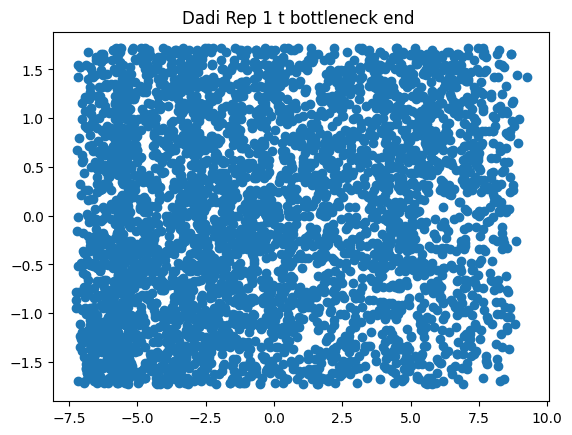

In [17]:
plt.figure()
plt.title("Dadi Rep 1 t bottleneck end ")
plt.scatter(post['training']['normalized_predictions']['dadi_rep1_t_bottleneck_end'], post['training']['normalized_targets']['simulated_params_t_bottleneck_end'])
plt.show()

## Calculate the MSE for each analysis type and for each stage.

In [18]:
a['opt_params_dadi']

,dadi_rep1_N0,moments_rep1_N0,moments_rep1_FIM_element_0,moments_rep1_FIM_element_1,moments_rep1_FIM_element_2,moments_rep1_FIM_element_3,moments_rep1_FIM_element_4,moments_rep1_FIM_element_5,dadi_rep1_Nb,moments_rep1_Nb,...,dadi_rep2_Nb,moments_rep2_Nb,dadi_rep2_N_recover,moments_rep2_N_recover,dadi_rep2_t_bottleneck_end,moments_rep2_t_bottleneck_end,momentsLD_N0,momentsLD_Nb,momentsLD_N_recover,momentsLD_t_bottleneck_end
0,-1.156629,-1.163359,0.633325,0.013137,1.070448,-0.030264,-1.376227,0.275692,-2.090425,-1.957803,...,-2.090422,-1.957803,0.117033,0.024037,4.616101,4.606680,-0.661291,2.354240,4.795701,-9.367692
1,1.273944,1.266424,-0.312813,0.994429,0.070430,-0.334302,0.374891,0.219778,-0.948273,-0.745117,...,-0.948273,-0.747675,2.328917,2.160618,1.740663,1.925076,1.486016,1.585594,4.520429,-9.851780
2,-0.549006,-0.547639,0.785296,-0.880350,0.601306,0.463157,-0.330648,0.596905,0.021470,0.431413,...,0.060094,0.431004,1.217491,0.849507,-2.412649,-1.441822,0.799337,11.305435,-2.702889,-5.079854
3,-0.371370,-0.383124,-0.702818,-1.309839,-1.338795,1.422382,-0.091657,-1.073644,-1.066740,-0.893117,...,-1.066683,-0.893922,3.012158,2.563135,-6.458212,-6.465295,-0.855719,4.663410,-0.828335,-12.603631
4,-0.083501,-0.088671,0.790385,0.518531,0.938689,-1.021171,-0.381558,0.844293,1.770680,1.971286,...,1.764477,1.940142,-1.098090,-1.164834,4.756120,5.127461,0.367382,-6.446438,-0.827639,8.194831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1.690322,-1.704602,0.278570,-1.352652,-0.025914,1.387708,-1.508798,-0.434497,-1.056091,-0.959352,...,-1.056100,-0.959378,2.499985,2.474260,-3.187421,-3.675214,-1.175257,0.907074,6.545274,-8.368436
3996,-1.585048,-1.588154,0.483476,-1.335489,0.152950,1.218017,-1.178714,0.367737,-0.672882,-0.499536,...,-0.669063,-0.499532,1.785923,1.368717,-3.921075,-3.516225,-1.469465,3.442878,6.394211,-8.754525
3997,0.465595,0.457335,-0.961258,0.368297,-0.916342,0.263615,0.862351,0.146386,-2.092091,-1.889396,...,-2.092121,-1.889396,0.639209,0.351348,-3.427327,-3.203537,-0.237831,34.892516,-2.113856,28.180965
3998,0.590176,0.581497,0.333460,1.346261,0.855989,-1.451560,-0.267828,0.613026,0.045806,0.173049,...,0.045559,0.173049,-0.545237,-0.597353,7.061670,7.049479,0.251900,-3.593022,0.781205,1.556069


## Postprocessing

In [19]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/postprocessing.py \
    --config_file $CONFIG_FILEPATH \
    --training_features_filepath $SIM_DIRECTORY/training_features.csv \
    --training_targets_filepath $SIM_DIRECTORY/training_targets.csv \
    --validation_features_filepath $SIM_DIRECTORY/validation_features.csv \
    --validation_targets_filepath $SIM_DIRECTORY/validation_targets.csv \
    --sim_directory $SIM_DIRECTORY


0      -1.156629
1       1.273944
2      -0.549006
3      -0.371370
4      -0.083501
          ...   
3995   -1.690322
3996   -1.585048
3997    0.465595
3998    0.590176
3999    0.588084
Name: dadi_rep1_N0, Length: 4000, dtype: float64

In [20]:
with open(os.path.join('/projects/kernlab/akapoor/Demographic_Inference',f'{SIM_DIRECTORY}', 'postprocessing_results.pkl'), 'rb') as f:
    post = pickle.load(f)

0.016217162734803618

In [21]:
post['training']['normalized_predictions']['dadi_rep1_t_bottleneck_end']

-1.9895573362790475

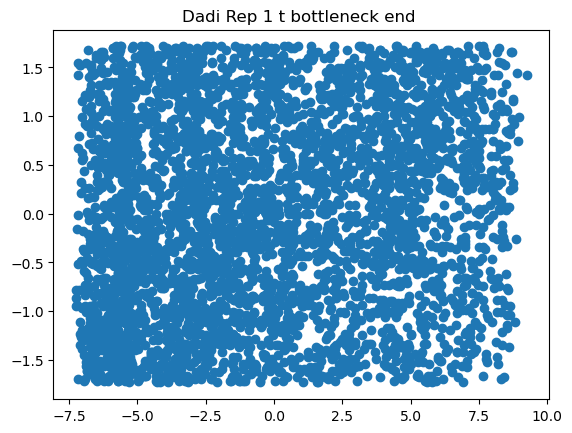

In [26]:
plt.figure()
plt.title("Dadi Rep 1 t bottleneck end ")
plt.scatter(post['training']['normalized_predictions']['dadi_rep1_t_bottleneck_end'], post['training']['normalized_targets']['simulated_params_t_bottleneck_end'])
plt.show()

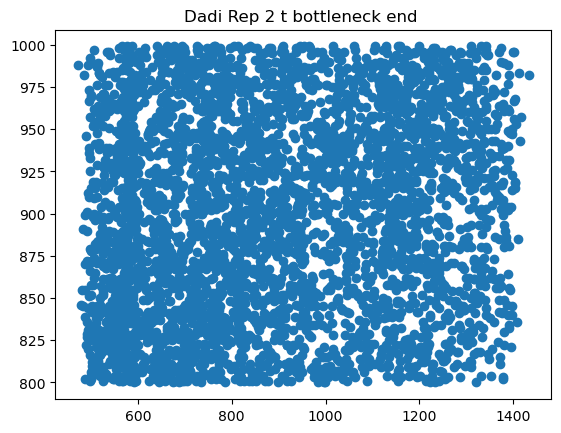

In [50]:
plt.figure()
plt.title("Dadi Rep 2 t bottleneck end ")
plt.scatter(post['training']['predictions']['moments_rep2_t_bottleneck_end'], post['training']['targets']['simulated_params_t_bottleneck_end'])
plt.show()

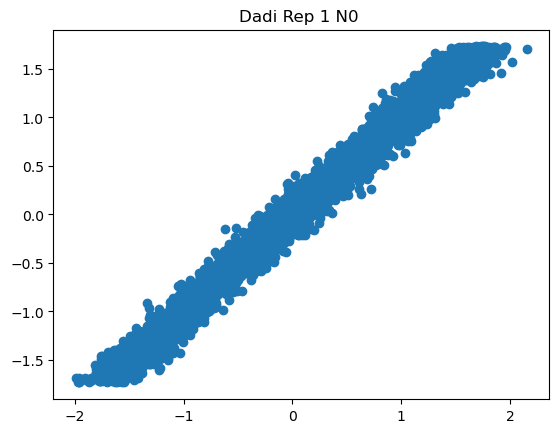

In [28]:
plt.figure()
plt.title("Dadi Rep 1 N0 ")
plt.scatter(post['training']['normalized_predictions']['dadi_rep1_N0'], post['training']['normalized_targets']['simulated_params_N0'])
plt.show()

## Calculate the MSE for each analysis type and for each stage.

In [30]:
post['training']['normalized_predictions']

,dadi_rep1_N0,moments_rep1_N0,moments_rep1_FIM_element_0,moments_rep1_FIM_element_1,moments_rep1_FIM_element_2,moments_rep1_FIM_element_3,moments_rep1_FIM_element_4,moments_rep1_FIM_element_5,dadi_rep1_Nb,moments_rep1_Nb,...,dadi_rep2_Nb,moments_rep2_Nb,dadi_rep2_N_recover,moments_rep2_N_recover,dadi_rep2_t_bottleneck_end,moments_rep2_t_bottleneck_end,momentsLD_N0,momentsLD_Nb,momentsLD_N_recover,momentsLD_t_bottleneck_end
0,-1.156629,-1.163359,0.633325,0.013137,1.070448,-0.030264,-1.376227,0.275692,-2.090425,-1.957803,...,-2.090422,-1.957803,0.117033,0.024037,4.616101,4.606680,-0.661291,2.354240,4.795701,-9.367692
1,1.273944,1.266424,-0.312813,0.994429,0.070430,-0.334302,0.374891,0.219778,-0.948273,-0.745117,...,-0.948273,-0.747675,2.328917,2.160618,1.740663,1.925076,1.486016,1.585594,4.520429,-9.851780
2,-0.549006,-0.547639,0.785296,-0.880350,0.601306,0.463157,-0.330648,0.596905,0.021470,0.431413,...,0.060094,0.431004,1.217491,0.849507,-2.412649,-1.441822,0.799337,11.305435,-2.702889,-5.079854
3,-0.371370,-0.383124,-0.702818,-1.309839,-1.338795,1.422382,-0.091657,-1.073644,-1.066740,-0.893117,...,-1.066683,-0.893922,3.012158,2.563135,-6.458212,-6.465295,-0.855719,4.663410,-0.828335,-12.603631
4,-0.083501,-0.088671,0.790385,0.518531,0.938689,-1.021171,-0.381558,0.844293,1.770680,1.971286,...,1.764477,1.940142,-1.098090,-1.164834,4.756120,5.127461,0.367382,-6.446438,-0.827639,8.194831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1.690322,-1.704602,0.278570,-1.352652,-0.025914,1.387708,-1.508798,-0.434497,-1.056091,-0.959352,...,-1.056100,-0.959378,2.499985,2.474260,-3.187421,-3.675214,-1.175257,0.907074,6.545274,-8.368436
3996,-1.585048,-1.588154,0.483476,-1.335489,0.152950,1.218017,-1.178714,0.367737,-0.672882,-0.499536,...,-0.669063,-0.499532,1.785923,1.368717,-3.921075,-3.516225,-1.469465,3.442878,6.394211,-8.754525
3997,0.465595,0.457335,-0.961258,0.368297,-0.916342,0.263615,0.862351,0.146386,-2.092091,-1.889396,...,-2.092121,-1.889396,0.639209,0.351348,-3.427327,-3.203537,-0.237831,34.892516,-2.113856,28.180965
3998,0.590176,0.581497,0.333460,1.346261,0.855989,-1.451560,-0.267828,0.613026,0.045806,0.173049,...,0.045559,0.173049,-0.545237,-0.597353,7.061670,7.049479,0.251900,-3.593022,0.781205,1.556069


In [31]:
post['training']['normalized_predictions']['dadi_rep1_N0']

0      -1.156629
1       1.273944
2      -0.549006
3      -0.371370
4      -0.083501
          ...   
3995   -1.690322
3996   -1.585048
3997    0.465595
3998    0.590176
3999    0.588084
Name: dadi_rep1_N0, Length: 4000, dtype: float64

In [32]:
mean_squared_error(post['training']['normalized_predictions']['dadi_rep1_N0'], post['training']['normalized_targets']['simulated_params_N0'])

0.016217162734803618

In [33]:
np.min(post['training']['normalized_predictions']['dadi_rep1_N0'])

-1.9895573362790475

In [22]:
mean_squared_error(post['training']['normalized_predictions']['dadi_rep1_Nb'], post['training']['normalized_targets']['simulated_params_Nb'])

1.8786598554324179

In [23]:
np.max(post['training']['normalized_predictions']['dadi_rep1_Nb'])

8.067030435537289

In [24]:
post['training']['normalized_targets']['simulated_params_Nb']

0       0.103923
1       1.427210
2       1.368320
3       0.360267
4       0.862561
          ...   
3995   -0.460726
3996   -1.326751
3997   -0.173205
3998   -0.374123
3999    1.538061
Name: simulated_params_Nb, Length: 4000, dtype: float64

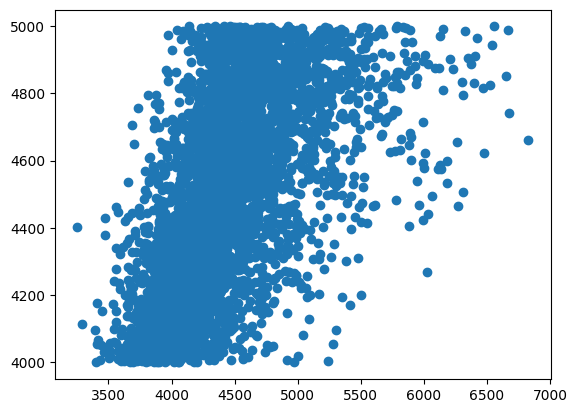

In [25]:
import matplotlib.pyplot as plt
plt.scatter(preproc['training']['predictions']['dadi_rep1_Nb'], preproc['training']['targets']['simulated_params_Nb'])

In [26]:
def plot_mse_and_sem(mse_results, sem_results, title, parameters):
    """
    Create a grouped bar plot showing MSE values with error bars for each parameter and analysis type.
    
    Parameters:
    -----------
    mse_results : dict
        Dictionary containing MSE values for each analysis type and parameter
    sem_results : dict
        Dictionary containing SEM values for each analysis type and parameter
    title : str
        Title for the plot
    parameters : list
        List of parameter names to plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create figure and axis with clean style
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Number of parameter groups and analysis types
    n_parameters = len(parameters)
    n_analyses = len(mse_results.keys())
    
    # Width of each bar and positions of the bars
    bar_width = 0.25
    index = np.arange(n_parameters)
    
    # Colors for different analysis types - using more distinct colors
    colors = ['#2ecc71', '#3498db', '#e74c3c']  # green, blue, red
    
    # Plot bars for each analysis type
    for i, (analysis_type, color) in enumerate(zip(mse_results.keys(), colors)):
        mse_values = []
        sem_values = []
        for param in parameters:
            mse_values.append(mse_results[analysis_type].get(param, 0))
            sem_values.append(sem_results[analysis_type].get(param, 0))
        
        positions = index + (i - 1) * bar_width
        bars = ax.bar(positions, mse_values, bar_width,
                     label=analysis_type, color=color, alpha=0.8)
        
        # Add error bars
        ax.errorbar(positions, mse_values, yerr=sem_values,
                   fmt='none', color='black', capsize=5)
    
    # Customize the plot
    ax.set_ylabel('Mean Squared Error (MSE)', fontsize=10)
    ax.set_title(title, fontsize=12, pad=20)
    ax.set_xticks(index)
    ax.set_xticklabels(parameters, fontsize=10)
    
    # Add legend with better positioning
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Add grid with light color
    ax.yaxis.grid(True, linestyle='--', alpha=0.3, color='gray')
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig

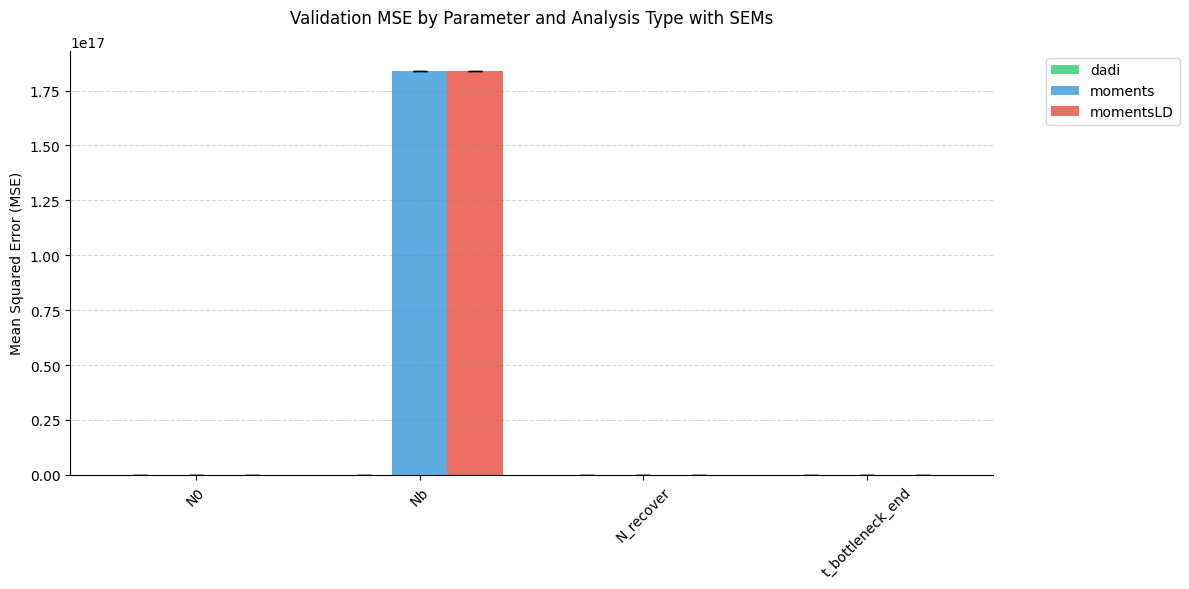

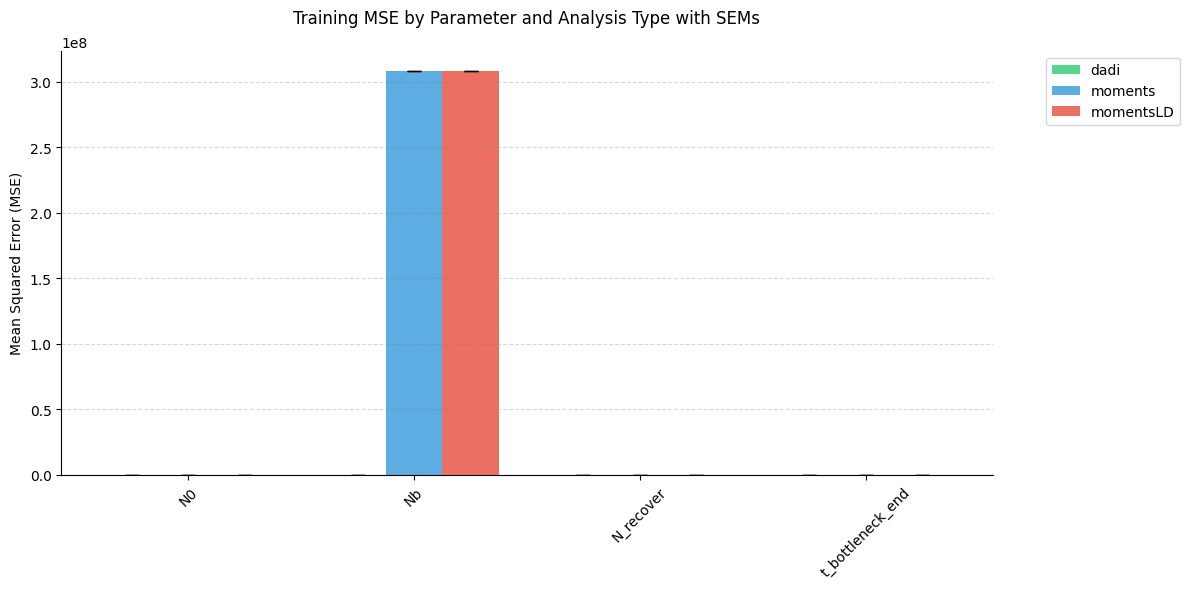

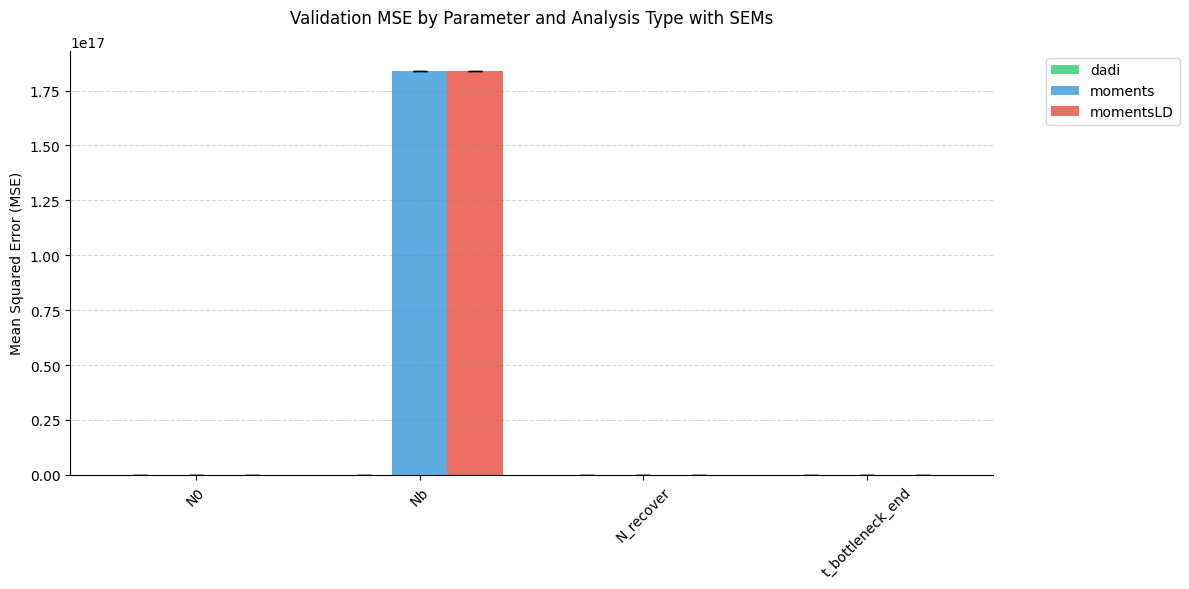

In [27]:
# Updated function to handle underscores in parameter names correctly
def calculate_mse_and_sem(post, key):
    predictions = post[key]['normalized_predictions']
    targets = post[key]['normalized_targets']
    mse_results = {}
    sem_results = {}

    for analysis_type in ['dadi', 'moments', 'momentsLD']:
        mse_values = {}
        sem_values = {}
        for column in predictions.columns:
            if column.startswith(analysis_type):
                # Extract parameter name after the last '_'
                param_name = "_".join(column.split('_')[-2:]) if 't_split' in column else column.split('_')[-1]
                target_column = f"simulated_params_{param_name}"
                if target_column in targets.columns:
                    mse = mean_squared_error(targets[target_column], predictions[column])
                    mse_values[param_name] = mse
                    sem = np.std(targets[target_column] - predictions[column]) / np.sqrt(len(targets[target_column]))
                    sem_values[param_name] = sem
        if mse_values:
            mse_results[analysis_type] = mse_values
            sem_results[analysis_type] = sem_values
    return mse_results, sem_results

# Parameters list
# parameters = ['Na', 'N1', 'N2', "t_split"]
parameters = experiment_config['parameters_to_estimate']

# Recalculate MSE and SEM for training and validation with the updated function
training_mse, training_sem = calculate_mse_and_sem(post, 'training')
validation_mse, validation_sem = calculate_mse_and_sem(post, 'validation')

# Re-plot with the fixed parameter handling
plot_mse_and_sem(training_mse, training_sem, "Training MSE by Parameter and Analysis Type with SEMs", parameters)
plot_mse_and_sem(validation_mse, validation_sem, "Validation MSE by Parameter and Analysis Type with SEMs", parameters)

In [28]:
training_mse

{'dadi': {'N0': 0.016214304782781908, 'Nb': 1.8654618850752627},
 'moments': {'N0': 68.90109253684578, 'Nb': 308292074.65493345},
 'momentsLD': {'N0': 68.90109253684578, 'Nb': 308292074.65493345}}

In [29]:
validation_mse

{'dadi': {'N0': 0.01610100689796418, 'Nb': 1.9783192228174216},
 'moments': {'N0': 152.2146763862601, 'Nb': 1.8389841749703555e+17},
 'momentsLD': {'N0': 152.2146763862601, 'Nb': 1.8389841749703555e+17}}

In [30]:
post['training']['predictions'].columns

Index(['dadi_rep1_N0', 'moments_rep1_N0', 'moments_rep1_FIM_element_0',
       'moments_rep1_FIM_element_1', 'moments_rep1_FIM_element_2',
       'moments_rep1_FIM_element_3', 'moments_rep1_FIM_element_4',
       'moments_rep1_FIM_element_5', 'dadi_rep1_Nb', 'moments_rep1_Nb',
       'dadi_rep1_N_recover', 'moments_rep1_N_recover',
       'dadi_rep1_t_bottleneck_end', 'moments_rep1_t_bottleneck_end',
       'dadi_rep2_N0', 'moments_rep2_N0', 'moments_rep2_FIM_element_0',
       'moments_rep2_FIM_element_1', 'moments_rep2_FIM_element_2',
       'moments_rep2_FIM_element_3', 'moments_rep2_FIM_element_4',
       'moments_rep2_FIM_element_5', 'dadi_rep2_Nb', 'moments_rep2_Nb',
       'dadi_rep2_N_recover', 'moments_rep2_N_recover',
       'dadi_rep2_t_bottleneck_end', 'moments_rep2_t_bottleneck_end',
       'momentsLD_N0', 'momentsLD_Nb', 'momentsLD_N_recover',
       'momentsLD_t_bottleneck_end'],
      dtype='object')

## Extracting Features

In [31]:
!python /sietch_colab/akapoor/Demographic_Inference/snakemake_scripts/extracting_features.py \
 --postprocessing_results_filepath $SIM_DIRECTORY/postprocessing_results.pkl \
 --sim_directory $SIM_DIRECTORY

dict_keys(['parameter_names', 'target_names', 'training', 'validation'])
Training features shape: (4000, 32)
Validation features shape: (1000, 32)
Training targets shape: (4000, 4)
Validation targets shape: (1000, 4)


## Linear Evaluation

In [44]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type standard

Model directory created/verified: bottleneck_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False
Initializing LinearRegression with kwargs={}
PREDICTIONS SHAPE TRAINING: (4000, 4)
[0.73627889 1.74761083 0.21991065 ... 0.78276989 0.25603403 0.23191013]
[1.11217656e+00 1.04690906e-01 1.60673019e+00 9.14077795e-02
 1.50092886e-01 3.31690838e-01 3.92428801e-02 5.79131327e-02
 5.95464997e-02 6.80304542e-01 7.89691178e-01 7.51500521e-01
 7.19812253e-03 1.62346633e-01 1.23726902e-01 1.74134796e-01
 1.44157821e+00 1.30066091e-01 3.34561191e-01 5.08923900e-01
 2.23148032e-01 3.01132327e-02 1.50317329e-01 5.20351288e-01
 3.68726747e-01 1.00503796e-01 2.29685942e-01 1.28761173e-01
 1.00405093e-01 2.88816552e-01 2.50146666e-01 7.92700497e-01
 1.14697436e+00 8.16460516e-01

### Ridge

In [ ]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type ridge

### Lasso

In [63]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type lasso

Model directory created/verified: bottleneck_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False
/gpfs/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.643e+02, tolerance: 3.220e-01
  model = cd_fast.enet_coordinate_descent(
/gpfs/home/akapoor/miniforge3/envs/snakemake-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

### Elastic Net

In [ ]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/linear_evaluation.py \
     --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
     --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
     --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
     --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
     --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json \
     --regression_type elasticnet

## Random Forest

In [45]:
!python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/random_forest_evaluation.py \
    --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
    --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
    --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
    --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
    --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json

Model directory created/verified: bottleneck_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False

No hyperparameters specified. Running RandomizedSearchCV to find best hyperparameters...

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best hyperparameters found via RandomizedSearchCV: {'random_state': 123, 'n_estimators': 300, 'min_samples_split': 10, 'max_depth': None}

Initializing RandomForestRegressor with kwargs={'n_estimators': 300, 'max_depth': None, 'random_state': 123, 'min_samples_split': 10}

Random Forest predictions shape (training): (4000, 4)
Random Forest predictions shape (validation): (1000, 4)

[0.26433813 0.3195455  0.04086566 ... 0.21216521 0.04624642 0.04891259]
[0.91403797 0.12901438 1.86490118 0.14747153 0.06528244 0.63464

## XGBoost

In [46]:
 !python /projects/kernlab/akapoor/Demographic_Inference/snakemake_scripts/xgboost_evaluation.py \
    --features_and_targets_filepath $SIM_DIRECTORY/features_and_targets.pkl \
    --model_config_path /projects/kernlab/akapoor/Demographic_Inference/model_config.json \
    --color_shades_file $SIM_DIRECTORY/color_shades.pkl \
    --main_colors_file $SIM_DIRECTORY/main_colors.pkl \
    --experiment_config_filepath /projects/kernlab/akapoor/Demographic_Inference/experiment_config.json

Model directory created/verified: bottleneck_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/models/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/num_hidden_neurons_10_num_hidden_layers_2_num_epochs_500_dropout_value_0_weight_decay_0_batch_size_64_EarlyStopping_False

No XGBoost hyperparameters specified. Running RandomizedSearchCV to find best hyperparameters...

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best hyperparameters found via RandomizedSearchCV: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Initializing XGBRegressor with kwargs={'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0, 'min_child_weight': 5, 'reg_lambda': 1, 'reg_alpha': 0}

XGBoost predictions shape (training): (4000, 4)
XGBoost predictions shape (validation): (1000, 4)

[0

## Neural Network

In [ ]:
    # parser.add_argument("--experiment_directory", type=str, required=True)
    # parser.add_argument("--model_config_file", type=str, required=True)
    # parser.add_argument("--features_file", type=str, required=True)
    # parser.add_argument("--color_shades", type=str, required=True)
    # parser.add_argument("--main_colors", type=str, required=True)

In [32]:
preproc['training']['predictions']

,dadi_rep1_N0,moments_rep1_N0,moments_rep1_FIM_element_0,moments_rep1_FIM_element_1,moments_rep1_FIM_element_2,moments_rep1_FIM_element_3,moments_rep1_FIM_element_4,moments_rep1_FIM_element_5,dadi_rep1_Nb,moments_rep1_Nb,...,dadi_rep2_Nb,moments_rep2_Nb,dadi_rep2_N_recover,moments_rep2_N_recover,dadi_rep2_t_bottleneck_end,moments_rep2_t_bottleneck_end,momentsLD_N0,momentsLD_Nb,momentsLD_N_recover,momentsLD_t_bottleneck_end
0,8332.220122,8328.334400,0.633325,0.013137,1.070448,-0.030264,-1.376227,0.275692,3896.546320,3934.830907,...,3896.547032,3934.830895,6533.784581,6506.938990,1166.510710,1165.966816,8618.203588,5179.610469,7884.399528,359.156033
1,9735.511851,9731.170513,-0.312813,0.994429,0.070430,-0.334302,0.374891,0.219778,4226.257100,4284.903351,...,4226.257100,4284.164826,7172.300522,7123.716788,1000.497213,1011.144317,9857.951497,4957.721486,7804.935477,331.207232
2,8683.031259,8683.820747,0.785296,-0.880350,0.601306,0.463157,-0.330648,0.596905,4506.197872,4624.538194,...,4517.347735,4624.420229,6851.459401,6745.231493,760.705641,816.756395,9461.497408,7763.597920,5719.743207,606.714474
3,8785.589683,8778.802999,-0.702818,-1.309839,-1.338795,1.422382,-0.091657,-1.073644,4192.058554,4242.179411,...,4192.075138,4241.946873,7369.535088,7239.913368,527.134934,526.726016,8505.950255,5846.210562,6260.880364,172.329038
4,8951.790406,8948.805914,0.790385,0.518531,0.938689,-1.021171,-0.381558,0.844293,5011.151265,5069.061283,...,5009.360539,5060.070677,6183.008825,6163.741373,1174.594708,1196.034103,9212.108102,2639.073710,6261.081085,1373.128792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8024.092313,8015.847400,0.278570,-1.352652,-0.025914,1.387708,-1.508798,-0.434497,4195.132737,4223.058845,...,4195.130296,4223.051390,7221.683389,7214.257214,715.974152,687.811413,8321.465155,4761.849721,8389.457940,416.848098
3996,8084.872121,8083.078998,0.483476,-1.335489,0.152950,1.218017,-1.178714,0.367737,4305.755711,4355.796337,...,4306.858168,4355.797636,7015.551604,6895.114698,673.616643,696.990648,8151.603863,5493.873245,8345.849693,394.557270
3997,9268.811540,9264.042337,-0.961258,0.368297,-0.916342,0.263615,0.862351,0.146386,3896.065457,3954.578476,...,3896.056709,3954.578476,6684.523731,6601.425337,702.123212,715.043693,8862.688041,14572.601795,5889.782364,2527.028778
3998,9340.738048,9335.727717,0.333460,1.346261,0.855989,-1.451560,-0.267828,0.613026,4513.222972,4549.954936,...,4513.151829,4549.954936,6342.603691,6327.559142,1307.705712,1307.001880,9145.434599,3462.783982,6725.514322,989.839683


In [ ]:
!python /sietch_colab/akapoor/Demographic_Inference/snakemake_scripts/setup_trainer.py \
    --experiment_directory $EXPERIMENT_DIRECTORY \
    --model_config_file $MODEL_CONFIG_FILEPATH \
    --features_file $SIM_DIRECTORY/features_and_targets.pkl \
    --color_shades $SIM_DIRECTORY/color_shades.pkl \
    --main_colors $SIM_DIRECTORY/main_colors.pkl

In [ ]:
preproc['training']['predictions'].columns

In [ ]:
import torch
print("Is CUDA available?", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("Current GPU:", torch.cuda.current_device())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")